##### Introdução

Com a baseline previamente estabelecida, este trecho tem como objetivo utilizá-la como referência central para a realização de comparações e validações dos resultados obtidos ao longo do desenvolvimento. A partir dessa linha de base, será possível mensurar de forma objetiva o impacto de diferentes configurações e abordagens no desempenho do sistema, permitindo uma análise criteriosa e fundamentada no contexto da Neuro-Evolução.

**dados**
-   Os dados analisados são referentes às <a href="https://gml.noaa.gov/ccgg/trends/gl_data.html">Tendências do dióxido de carbono atmosférico</a>, cobrindo o período de 1979 à 2024.
-   As medições estão na escala de partes por milhão (ppm). Por exemplo uma concentração de 0,000400 corresponde a 400 ppm.
    -   **Mais especificamente:** a medição representa uma fração molar de CO₂ no ar seco, ou seja, o número de moléculas de dióxido de carbono dividido pelo número total de moléculas no ar (incluindo o próprio CO₂), após a remoção do vapor d’água.

**dataSet**
-   Obtido a partir do site <a href="https://gml.noaa.gov/">gml.noaa.gov</a>, que é um site oficial do governo dos Estados Unidos, cuja sigla GML e NOAA significam respectivamente, Global Monitoring Laboratory (Laboratório de Monitoramento Global) e National Oceanic and Atmospheric Administration (Administração Oceânica e Atmosférica Nacional)

# Análise de Séries temporais com Deep Learning

## Índice
- [x](#x)

## Pip Install e importação de bibliotecas

In [329]:
# pip install tensorflow pandas numpy

In [330]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from sklearn import linear_model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import aux_functions as aux
import importlib
importlib.reload(aux)

<module 'aux_functions' from '/home/elizeta/VsCode/Otimizacao-de-Gas-com-Neuro-Evolucao/Trends_Atmospheric_CO2/aux_functions.py'>

In [331]:
# Garantir reprodutibilidade total
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [332]:
full_data_set = aux.ler_csv('dataSet.csv')
df = aux.ler_csv('dataSet.csv', average_only=True)

In [333]:
dataset = df.values
dataset = dataset.astype(np.float32)
type(dataset)

numpy.ndarray

In [334]:
window_size = 12
X, y = aux.criarJanelas(dataset, window_size)
X[:3], y[:3]

(array([[336.56, 337.29, 337.88, 338.32, 338.26, 337.38, 335.56, 334.36,
         335.02, 336.36, 337.36, 337.89],
        [337.29, 337.88, 338.32, 338.26, 337.38, 335.56, 334.36, 335.02,
         336.36, 337.36, 337.89, 338.57],
        [337.88, 338.32, 338.26, 337.38, 335.56, 334.36, 335.02, 336.36,
         337.36, 337.89, 338.57, 339.26]], dtype=float32),
 array([338.57, 339.26, 339.59], dtype=float32))

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [336]:
scaler = MinMaxScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
# X_scaled_train = X_scaled_train.reshape(-1, window_size, 1)
# X_scaled_test = X_scaled_test.reshape(-1, window_size, 1)

In [337]:
X_scaled_test.shape

(135, 12)

In [338]:
def create_model(df_shape, neurons=24, optimizer='adam', loss='mse', dropout_rate=0.2):
    model = models.Sequential([
        Input(shape=(df_shape,)),
        Dense(neurons, activation='relu'),
        # Dropout(dropout_rate),
        Dense(neurons, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])

    optimizer_instance = Adam() if optimizer == 'adam' else RMSprop()
    model.compile(optimizer=optimizer_instance, loss=loss, metrics=['mae'])
    return model

In [339]:
model = create_model(X_scaled_train.shape[1])

history = model.fit(X_scaled_train,
                    y_train,
                    validation_data=(X_scaled_test, y_test),
                    epochs=100,
                    batch_size=12,
                    verbose=1)

Epoch 1/100


2025-05-14 13:50:52.823995: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 131961.4375 - mae: 362.9375 - val_loss: 165140.7969 - val_mae: 406.3003
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 130744.3438 - mae: 361.2880 - val_loss: 157984.2188 - val_mae: 397.4116
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126829.7734 - mae: 355.9186 - val_loss: 136442.6094 - val_mae: 369.3566
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115864.5547 - mae: 340.2920 - val_loss: 89277.2266 - val_mae: 298.7720
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92720.2500 - mae: 303.8809 - val_loss: 25541.1602 - val_mae: 158.8773
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58668.3203 - mae: 236.8099 - val_loss: 4040.2351 - val_mae: 52.5544
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29758.8574 - mae: 152.2700 - val_loss: 58311.0664 - val_mae: 234.7232
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20259.5742 - mae: 122.4068 - val_loss: 83906.

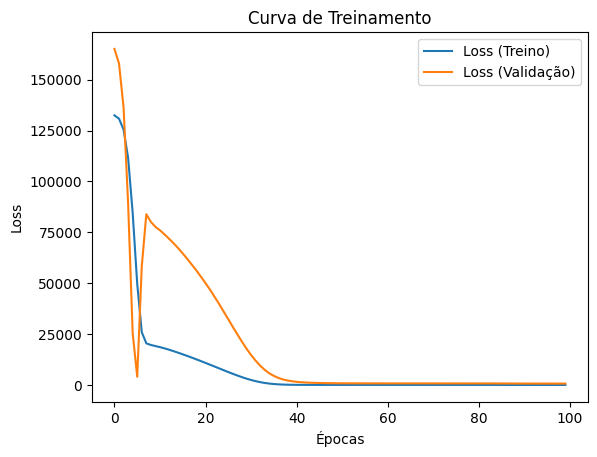

In [340]:
# Histórico de perda (loss)
plt.plot(history.history['loss'], label='Loss (Treino)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Curva de Treinamento')
plt.show()

In [341]:
y_pred = model.predict(X_scaled_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


2025-05-14 13:50:59.248902: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


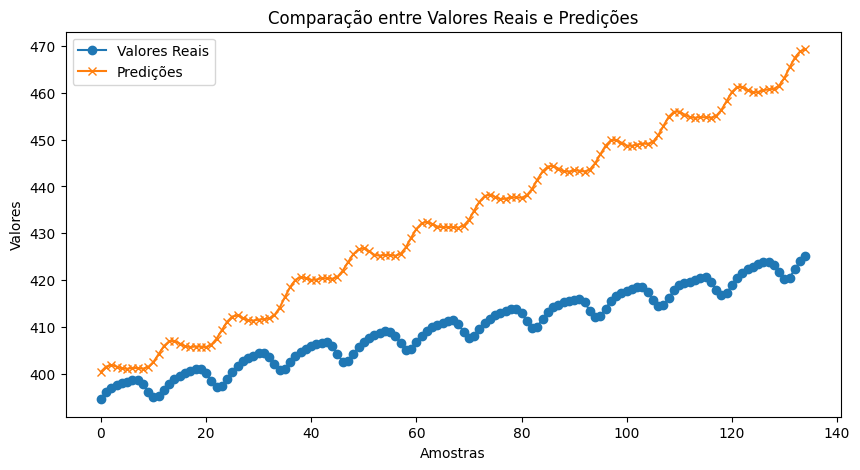

In [342]:
# Comparação entre valores reais e previstos
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Predições', marker='x')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.title('Comparação entre Valores Reais e Predições')
plt.show()

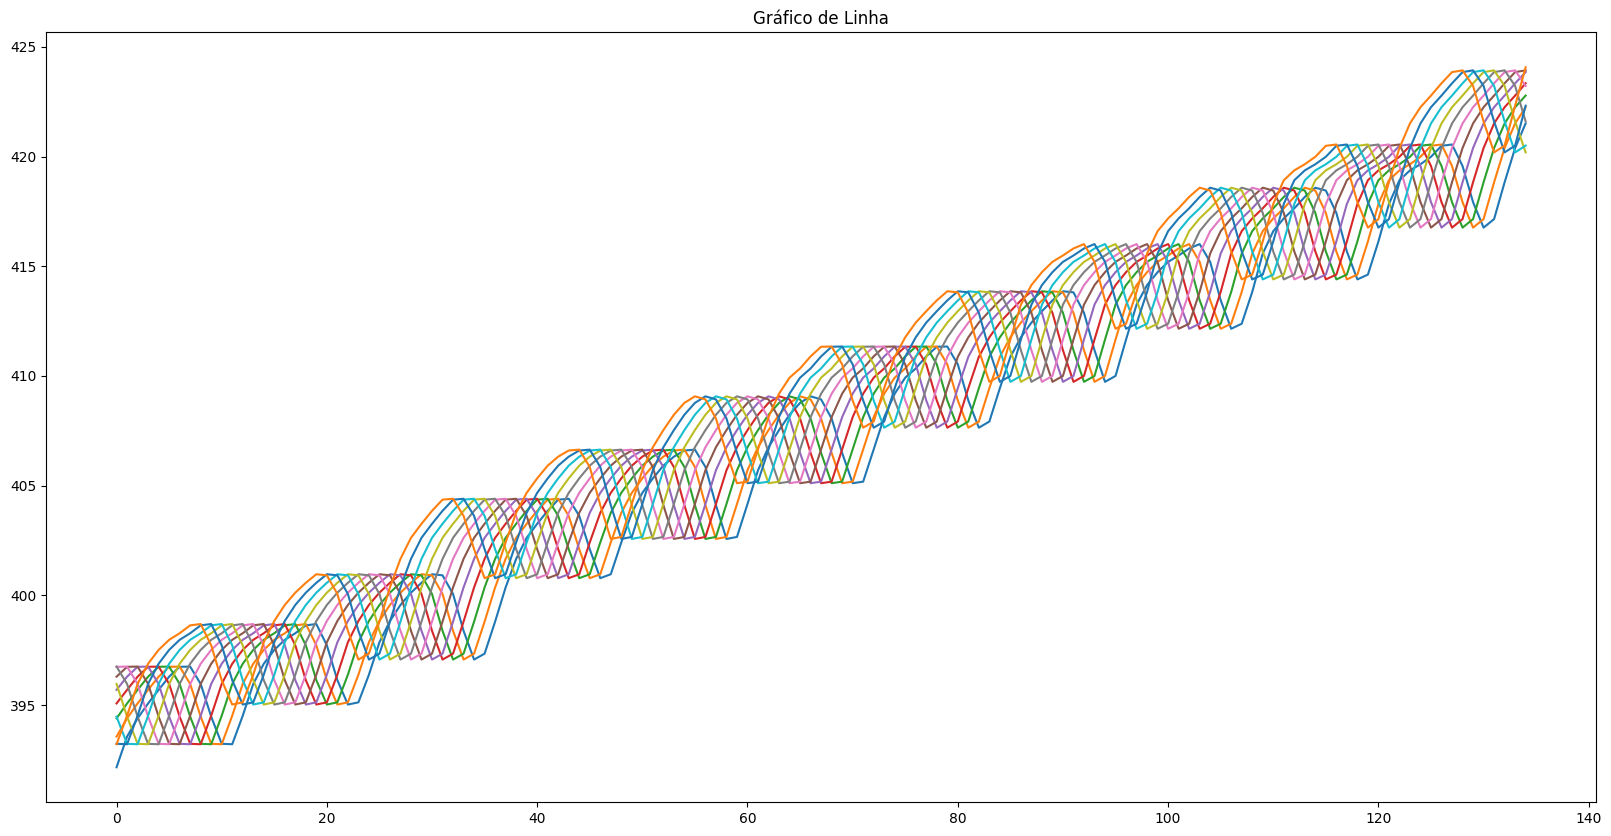

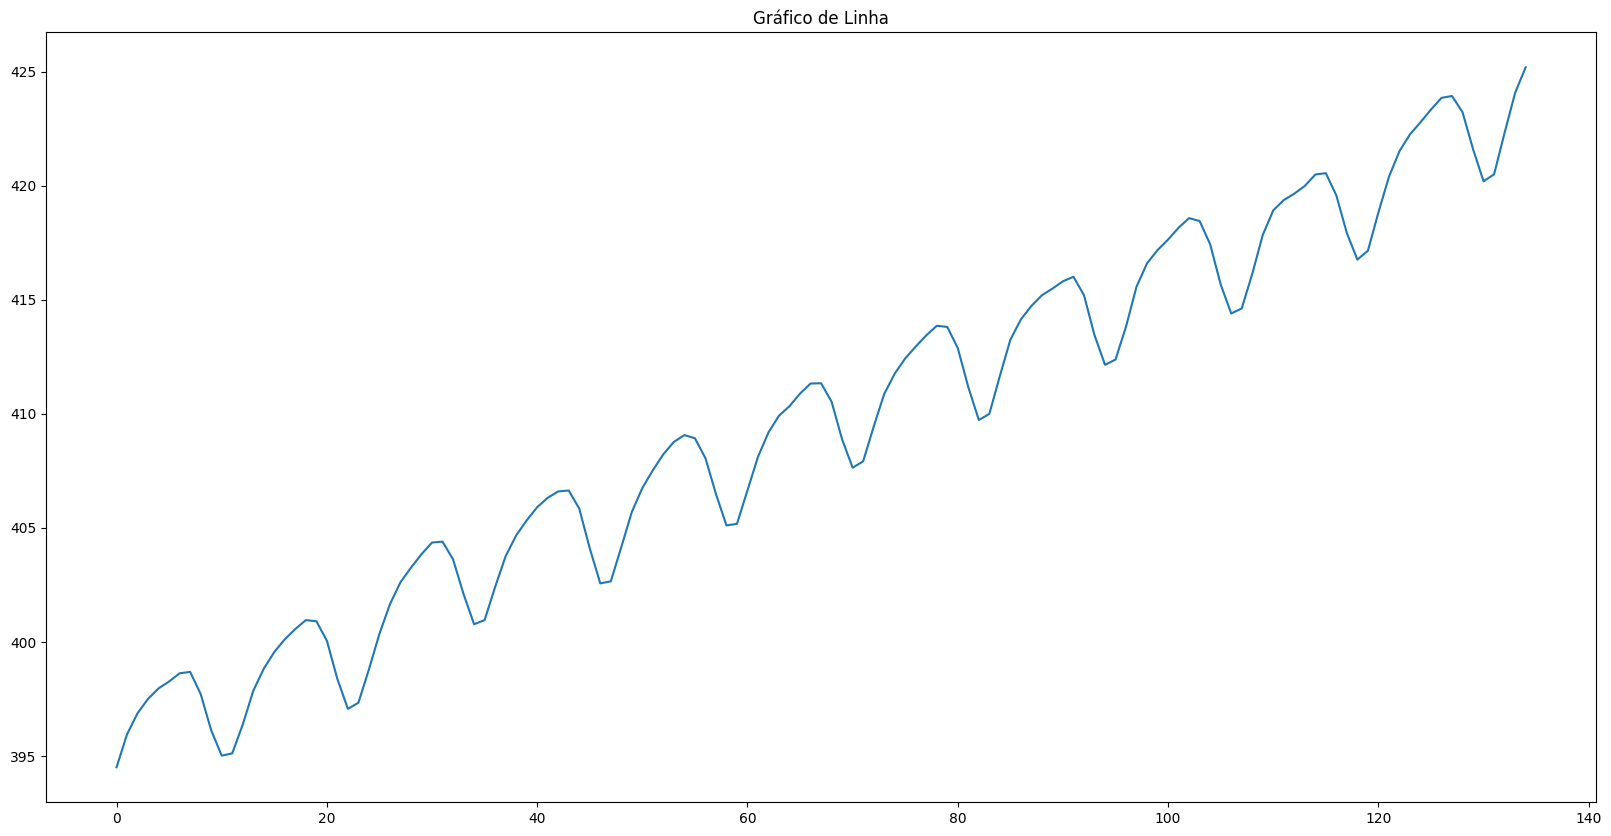

In [343]:
aux.plotLine(X_test)
aux.plotLine(y_test)